# 10ML/ML3.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

## Decision Trees and Random Forests
- Random forests are an example of an ensemble method built on decision trees
- Decision trees are a series of questions designed to zero in on the classification
- In a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes
- Axis-aligned splits in the data; that is, each node in the tree splits the data into two groups using a cutoff value within one of the features

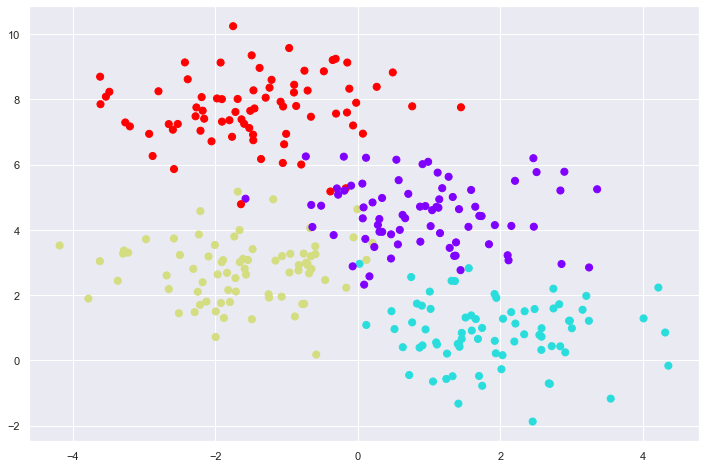

In [2]:
#generate 2D data with 4 classifications
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

- A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it

### Decision tree classifier estimator

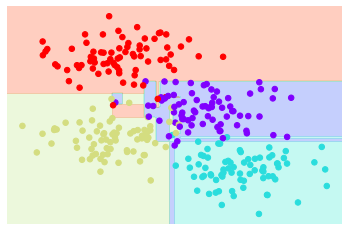

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

#visualize output of classifier
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(DecisionTreeClassifier(), X, y)

- This decision tree, even at only five levels deep, is clearly overfitting our data
- We can fit multiple trees on subsets of the data and aggregate the results -> random forests
- Bagging makes use of an ensemble of parallel estimators, each of which overfits the data, and averages the results to find a better classification

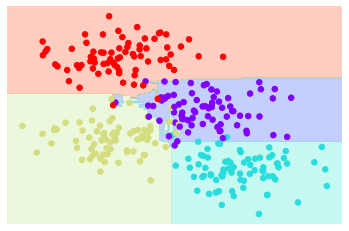

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
#fit 100 estimators of 80% of the data each time
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)

visualize_classifier(bag, X, y)

- Decision trees are more effectively randomized when some stochasticity is injected in how the splits are chosen
- Random forest classifier - optimized ensemble of decision trees

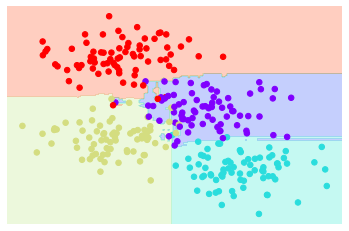

In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

### Random Forest Regression

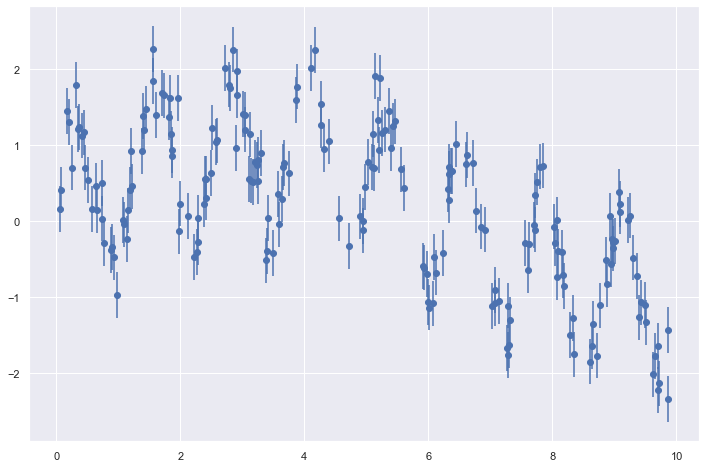

In [6]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.figure(figsize=(12, 8))
plt.errorbar(x, y, 0.3, fmt='o');

### Find best-fit curve

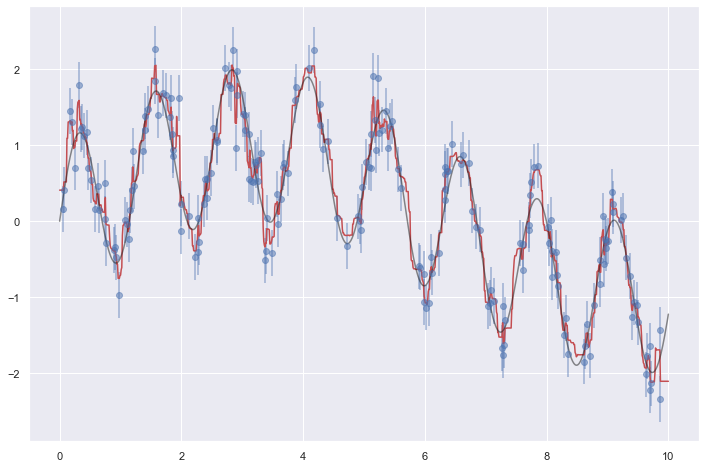

In [7]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.figure(figsize=(12, 8))
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r'); #red is model
plt.plot(xfit, ytrue, '-k', alpha=0.5); #black is true

### Example: random forest for classifying digits

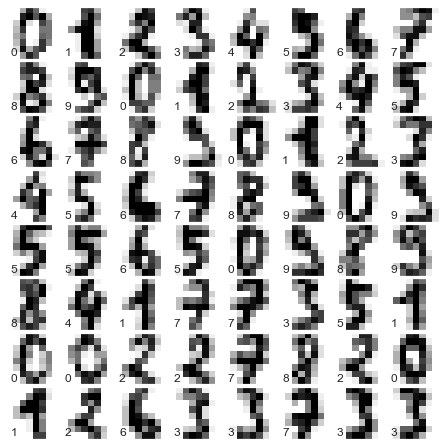

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [9]:
#quickly classify
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [10]:
#classification report
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.96      0.96      0.96        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



- From wiki:
    - In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.
    - Suppose a computer program for recognizing dogs (the relevant element) in photographs identifies eight dogs in a picture containing ten cats and twelve dogs, and of the eight it identifies as dogs, five actually are dogs (true positives), while the other three are cats (false positives). Seven dogs were missed (false negatives), and seven cats were correctly excluded (true negatives). The program's precision is then 5/8 (true positives / all positives) while its recall is 5/12 (true positives / relevant elements).

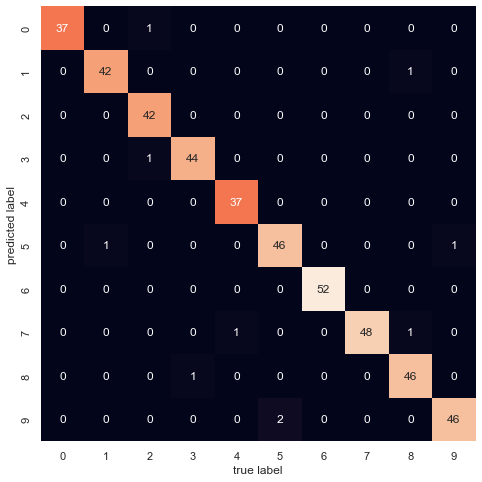

In [11]:
#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
plt.figure(figsize=(12, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Advantages:**
- Both training and prediction are very fast, because of the simplicity of the underlying decision trees. In addition, both tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.
- The multiple trees allow for a probabilistic classification: a majority vote among estimators gives an estimate of the probability (accessed in Scikit-Learn with the predict_proba() method).
- The nonparametric model is extremely flexible, and can thus perform well on tasks that are underfit by other estimators

**Disadvantages:**
- Results are not easily interpretable

## Principal Component Analysis
- Unsupervised estimators can highlight interesting aspects of the data without reference to any known labels

### PCA - dimensionality reduction

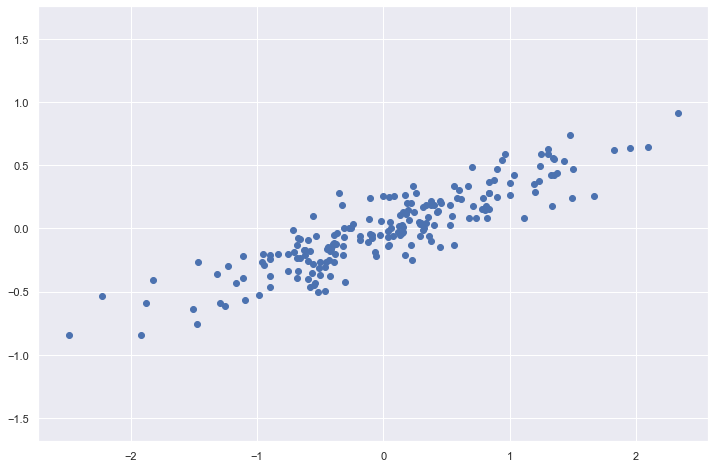

In [12]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

- In principal component analysis, one quantifies this relationship by finding a list of the principal axes in the data, and using those axes to describe the dataset

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

#components and explained variance
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


- To see what these numbers mean, visualize them as vectors over the input data, using the components to define the direction of the vector, and the explained variance to define the squared-length of the vector

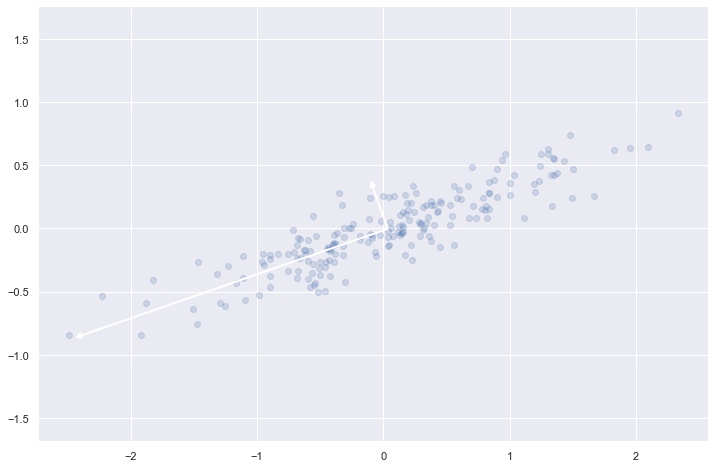

In [14]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

- These vectors represent the principal axes of the data, and the length shown is an indication of how important that axis is in describing the distribution of the data - more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the principal components of the data.


- Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance

In [15]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:", X.shape)
print("transformed shape:", X_pca.shape)

original shape: (200, 2)
transformed shape: (200, 1)


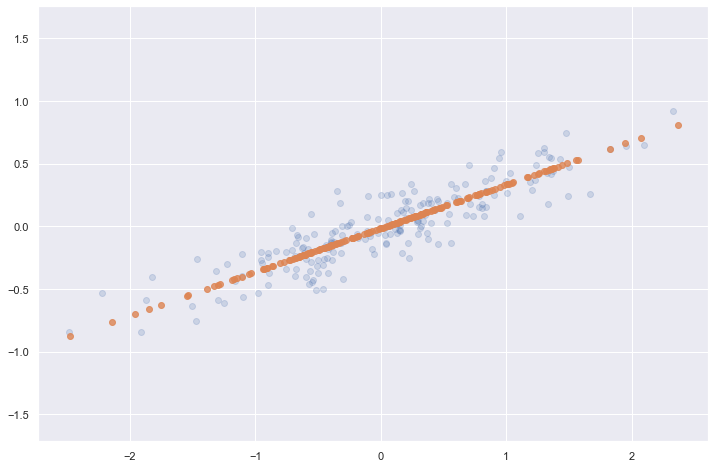

In [16]:
#inverse transform of this reduced data and plot it along with the original data
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### PCA for visualization: Handwritten digits

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


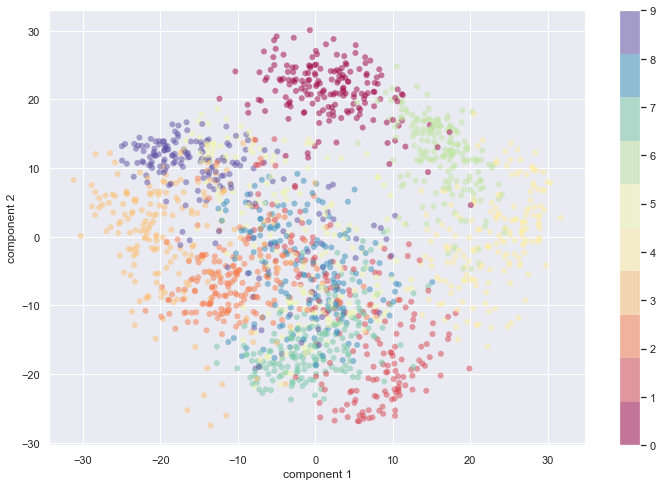

In [18]:
#plot the reduced data
plt.figure(figsize=(12, 8))
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

- Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner - that is, without reference to the labels.

### Choosing the number of components
- Cumulative explained variance ratio as a function of the number of components

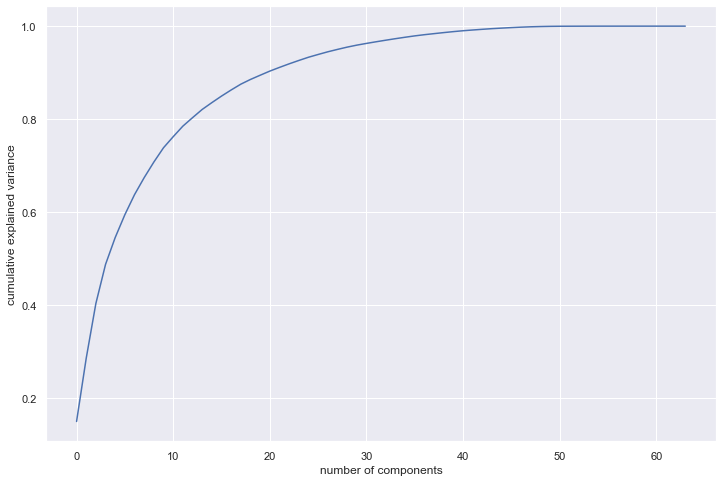

In [19]:
pca = PCA().fit(digits.data)
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

- This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components
- Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations

### PCA as Noise Filtering
- Any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

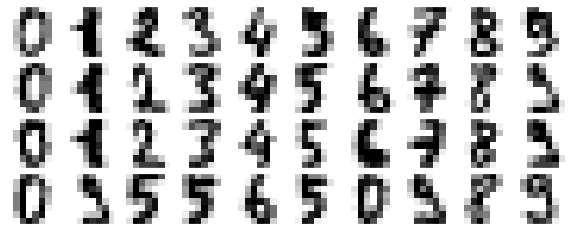

In [20]:
#noise free digits
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

plot_digits(digits.data)

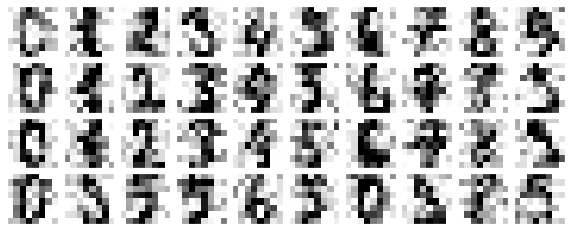

In [21]:
#add noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [22]:
#fit PCA, preserving 50% of variance
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

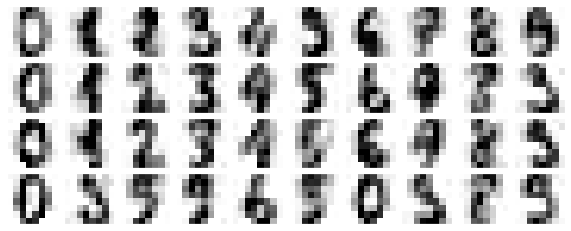

In [23]:
#compute components, and use inverse of transform to reconstruct
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [24]:
#look back at facial recognition SVM
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### Randomized PCA
- Randomized method to approximate first N principal components
- Much faster

In [25]:
#dimensionality of nearly 3000 down to 150
from sklearn.decomposition import PCA
pca = PCA(150, svd_solver = 'randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

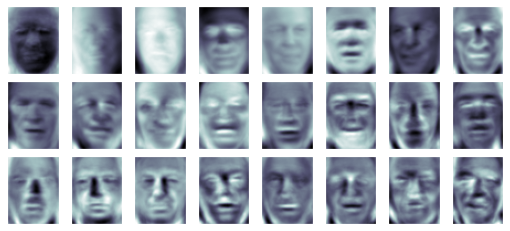

In [26]:
#plot the reduction (eigen faces)
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

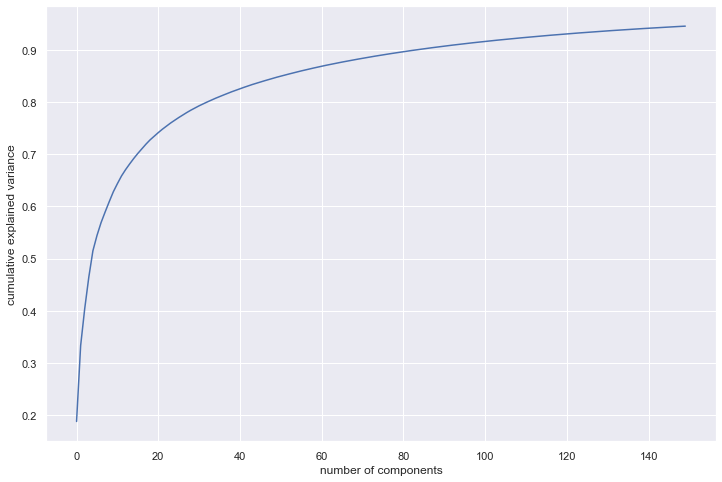

In [27]:
#explained variance
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

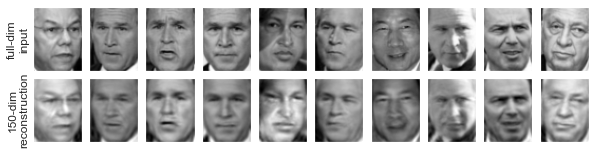

In [28]:
# Compute the components and projected faces
pca = PCA(150, svd_solver = 'randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

- PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
- It does not perform so well when there are nonlinear relationships within the data

## Manifold Learning
- Imagine a piece of paper. Rotating, reorienting, or stretching the piece of paper in three-dimensional space doesn't change the flat geometry of the paper: such operations are akin to linear embeddings. If you bend, curl, or crumple the paper, it is still a two-dimensional manifold, but the embedding into the three-dimensional space is no longer linear. Manifold learning algorithms would seek to learn about the fundamental two-dimensional nature of the paper, even as it is contorted to fill the three-dimensional space.

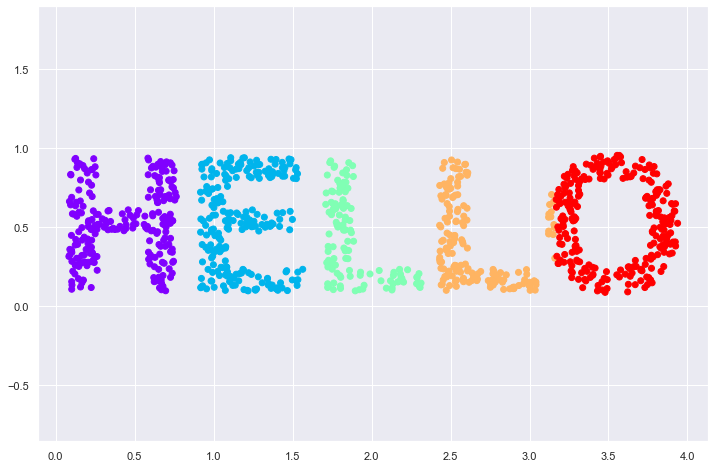

In [29]:
#a function for creating data in the shape of hello
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

#visualize
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

- If we use a rotation matrix to rotate the data, the x and y values change, but the data is still fundamentally the same

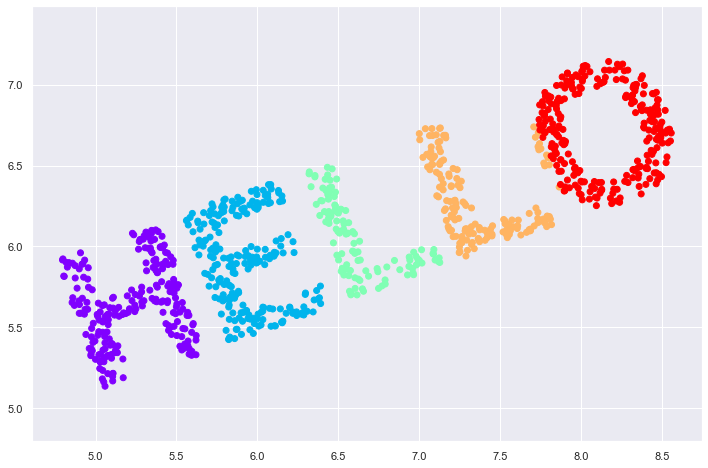

In [30]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.figure(figsize=(12, 8))
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

- x and y values are not necessarily fundamental to the relationships in the data - what is fundamental is the distance between the points

In [31]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

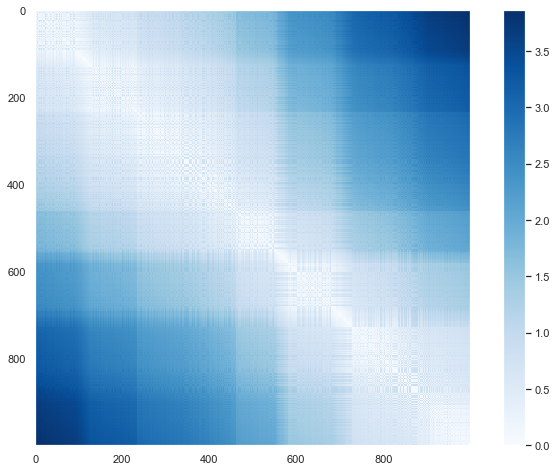

In [32]:
#visualize
plt.figure(figsize=(12, 8))
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [33]:
#distance matrix for rotated and translated data
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

- This distance matrix gives us a representation of our data that is invariant to rotations and translations

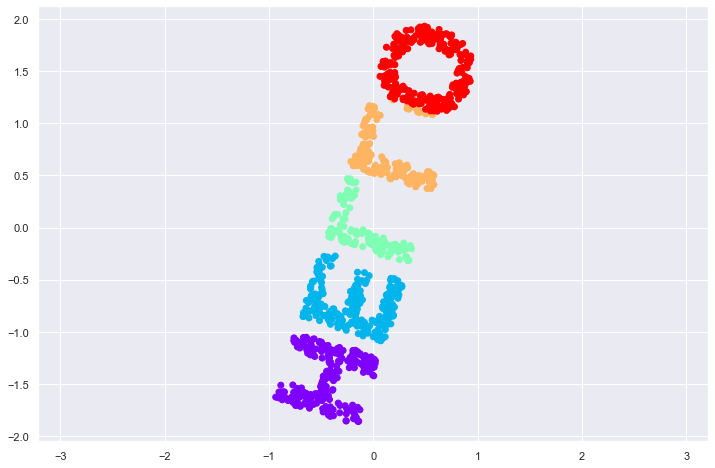

In [34]:
#transform back into x and y coordinates not always intuitive - using only distance matrix...
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.figure(figsize=(12, 8))
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

- The usefulness of this becomes more apparent when we consider the fact that distance matrices can be computed from data in any dimension

In [35]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)
X3.shape

(1000, 3)

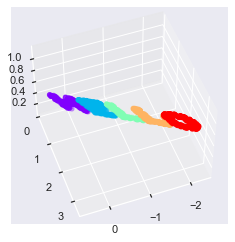

In [36]:
#visualize
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)

- We can now ask the MDS (multi-dimensional scaling) estimator to input this three-dimensional data, compute the distance matrix, and then determine the optimal two-dimensional embedding for this distance matrix. The result recovers a representation of the original data

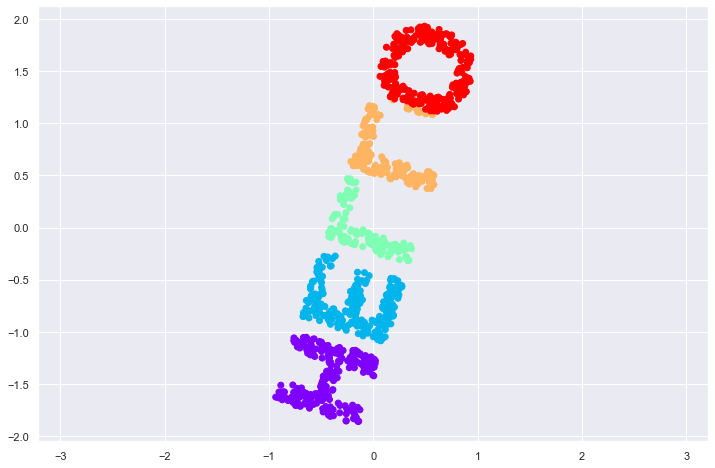

In [37]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.figure(figsize=(12, 8))
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

- Manifold learning seeks low-dimensional representation that preserves certain relationships - MDS quantity preserved is distance between points
- MDS fails when embeddings are nonlinear
- Consider the following embedding, which takes the input and contorts it into an S shape in three dimensions:

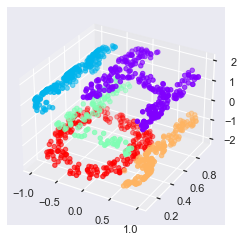

In [38]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

#visualize much more complicated embedding
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize);

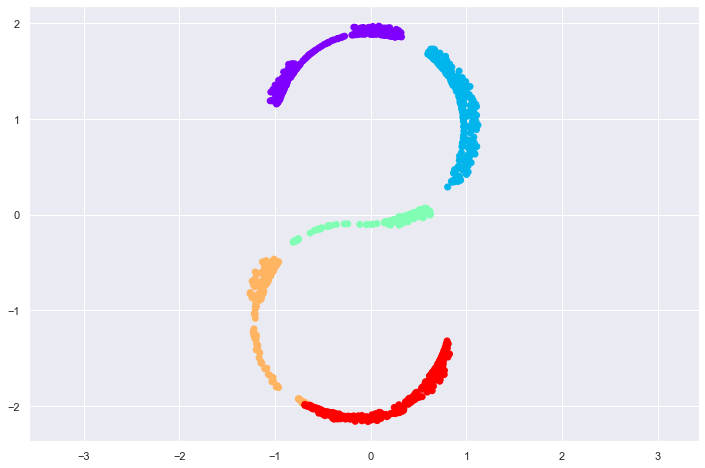

In [39]:
#MDS fails - throws out original y axis
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.figure(figsize=(12, 8))
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

## Nonlinear Manifolds: Locally Linear Embedding (LLE)
- Modify the algorithm such that it only preserves distances between nearby points - closer to what we want

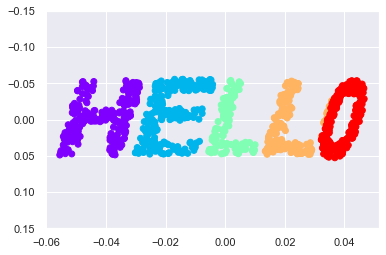

In [40]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

- In practice manifold learning techniques tend to be finicky enough that they are rarely used for anything more than simple qualitative visualization of high-dimensional data - PCA tends to be better
    - In manifold learning, there is no good framework for handling missing data. In contrast, there are straightforward iterative approaches for missing data in PCA.
    - In manifold learning, the presence of noise in the data can short-circuit the manifold and drastically change the embedding. In contrast, PCA naturally filters noise from the most important components.
    - The manifold embedding result is generally highly dependent on the number of neighbors chosen, and there is generally no solid quantitative way to choose an optimal number of neighbors. In contrast, PCA does not involve such a choice.
    - In manifold learning, the globally optimal number of output dimensions is difficult to determine. In contrast, PCA lets you find the output dimension based on the explained variance.
    - In manifold learning, the meaning of the embedded dimensions is not always clear. In PCA, the principal components have a very clear meaning.
    - In manifold learning the computational expense of manifold methods scales as O[N 2 ] or O[N 3 ]. For PCA, there exist randomized approaches that are generally much faster (though see the megaman package for some more scalable implementations of manifold learning).
- However, can preserve nonlinear relationships
- Explore manifold only after PCA
- For high-dimensional data from real-world sources, LLE often produces poor results, and isometric mapping (Isomap) seems to generally lead to more meaningful embeddings. This is implemented in sklearn.manifold.Isomap

In [41]:
#Isomap on faces
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2208, 2914)

- We have 2,370 images, each with 2,914 pixels. In other words, the images can be thought of as data points in a 2,914-dimensional space
- We saw that for this data, nearly 100 components are required to preserve 90% of the variance. This tells us that the data is intrinsically very high dimensional - it can't be described linearly with just a few components.

In [42]:
#Isomap embedding (slower)
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape
#2-D projection of all input images

(2208, 2)

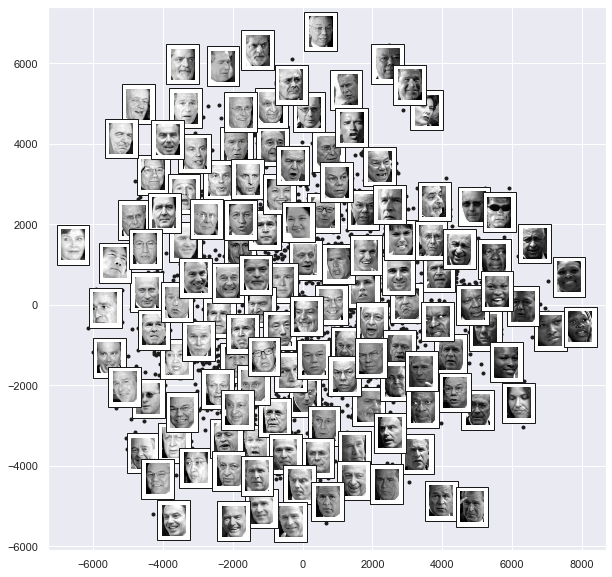

In [43]:
#output thumbnails at location of projections
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
            # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap), proj[i])
            ax.add_artist(imagebox)

fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data, model=Isomap(n_components=2), images=faces.images[:, ::2, ::2])

- Mostly useful for getting an understanding of the data and intuition as to how to move forward in building our pipeline

## K-Means Clustering
- Unsupervised; clustering instead of dimensionality reduction
- The k-means algorithm searches for a predetermined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:
    - The “cluster center” is the arithmetic mean of all the points belonging to the cluster.
    - Each point is closer to its own cluster center than to other cluster centers.

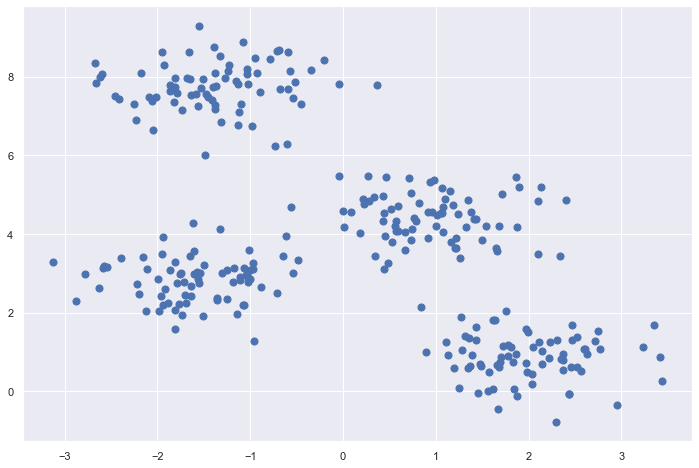

In [44]:
#generate data and visalize (withot any labels)
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], s=50);

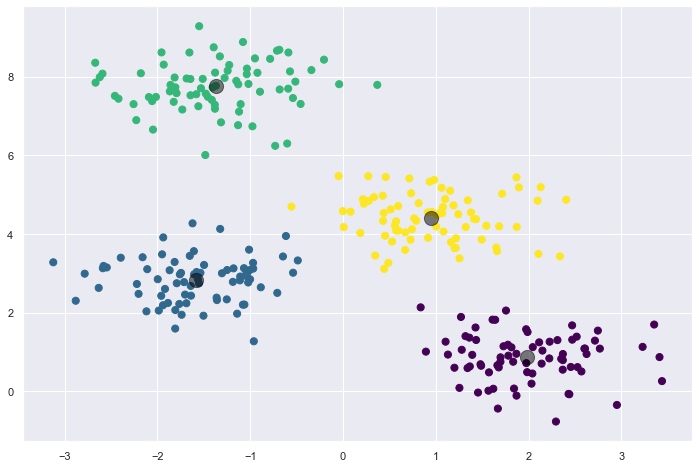

In [45]:
#automatically determine clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#visualize
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

- An exhaustive search would be very, very costly. Fortunately for us, such an exhaustive search is not necessary; instead, the typical approach to k-means involves an intuitive iterative approach known as expectation-maximization

- Algorithm
    1. Guess some cluster centers
    2. Repeat until converged
- a. **E-Step:** assign points to the nearest cluster center
- b. **M-Step:** set the cluster centers to the mean
- Under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

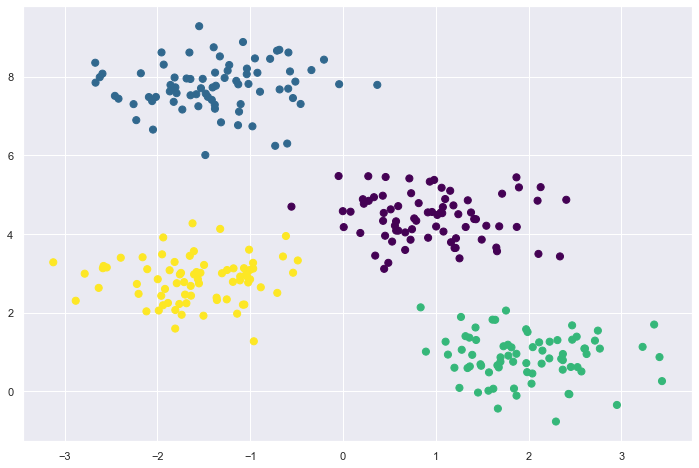

In [46]:
#very basic implementation
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

#most implementations will do more under the hood

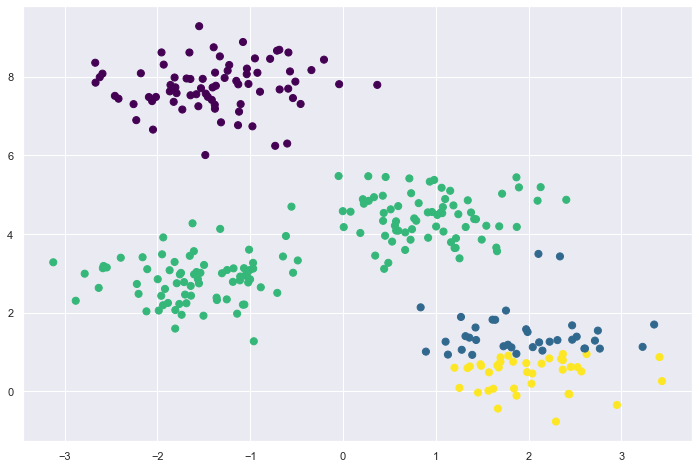

In [47]:
#no assurance that will lead to global best solution
centers, labels = find_clusters(X, 4, rseed=0)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

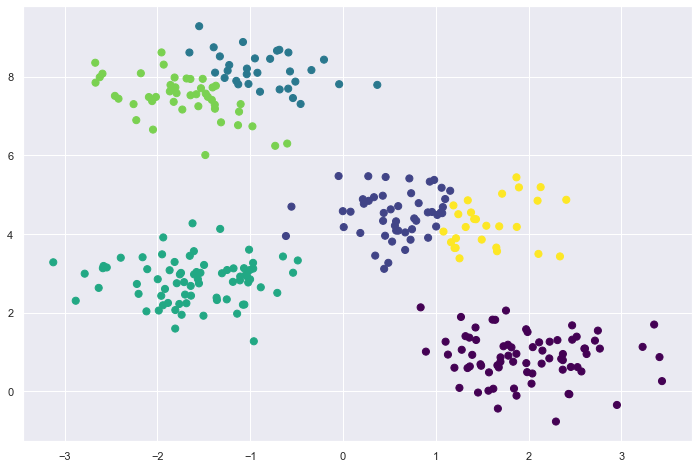

In [48]:
#number of clusters must be determined beforehand
labels = KMeans(6, random_state=0).fit_predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

- k-means is limited to linear cluster boundaries. The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

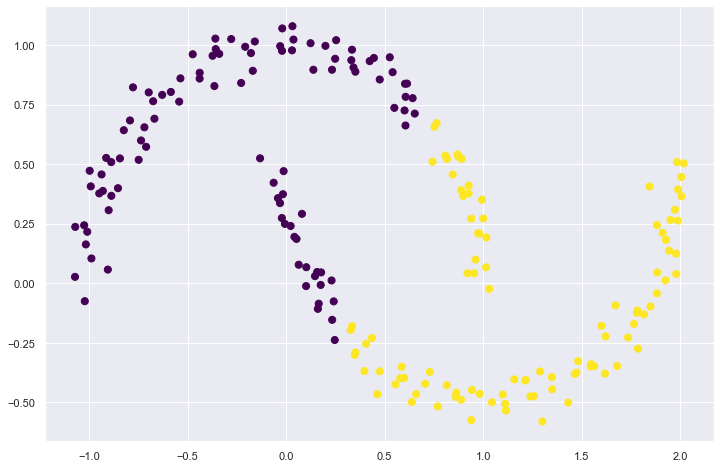

In [49]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### Kernalized k-means
- Higher dimensional representation of the data before k-means algorithm

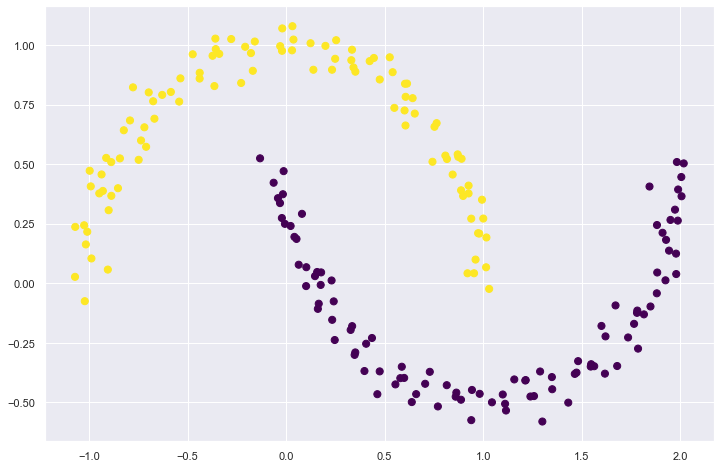

In [50]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [51]:
#k-means on digits with no a priori knowledge of lables
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [52]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

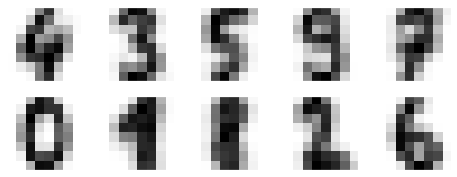

In [53]:
#result is 10 clusters in 64 dimensions
#typical digit:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [54]:
#match each cluster to true label for accuracy assessment
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [55]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

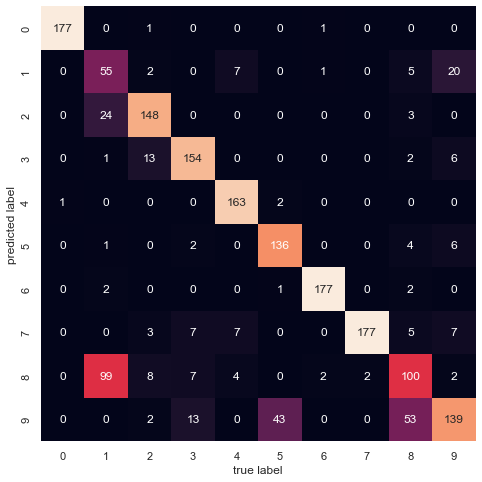

In [56]:
#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
plt.figure(figsize=(12, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

- t-distributed stochastic neighbor embedding (t-SNE) algorithm to preprocess the data before performing k-means. t-SNE is a non‐linear embedding algorithm that is particularly adept at preserving points within clusters

In [57]:
from sklearn.manifold import TSNE
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)
#no labels, almost 94% accuracy

0.9432387312186978

### k-means for color compression

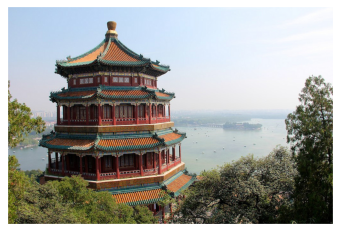

In [58]:
# Note: this requires the pillow package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [59]:
china.shape

(427, 640, 3)

In [60]:
#cloud of points in 3D color space
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

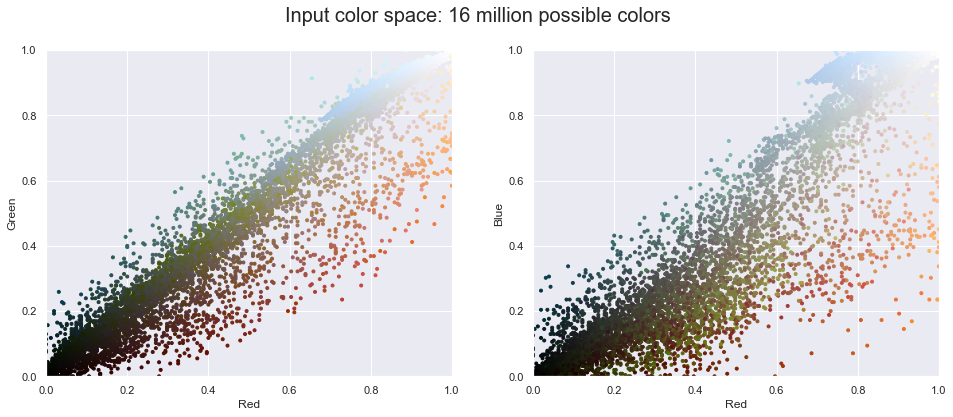

In [61]:
#visualize using a subset of 10,000 pixels
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);

plot_pixels(data, title='Input color space: 16 million possible colors')

- Now let’s reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm

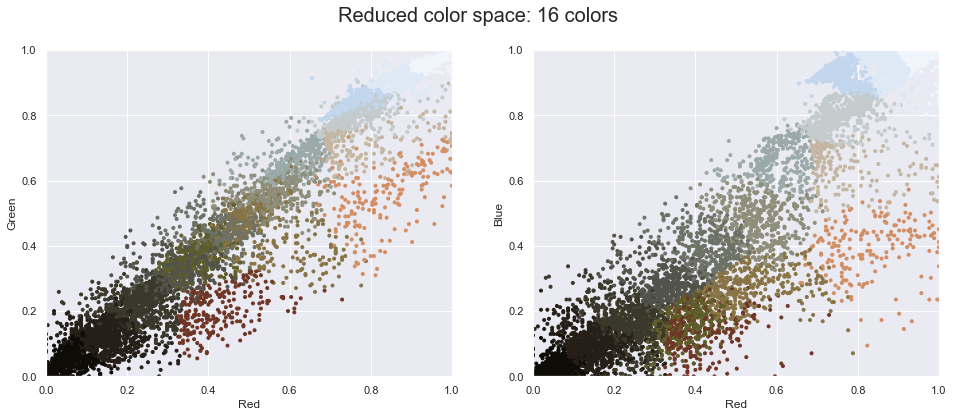

In [62]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

- The result is a recoloring of the original pixels, where each pixel is assigned the color of its closest cluster center. Plotting these new colors in the image space rather than the pixel space shows us the effect of this

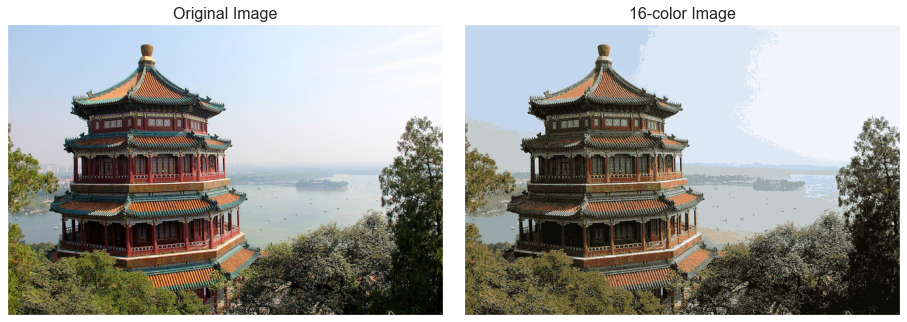

In [63]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

# 10ML/ML4.py

## Gaussian Mixture Models
- The nonprobabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations
- Extension of k-means
- Can be used for estimation beyond simple clustering

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [65]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

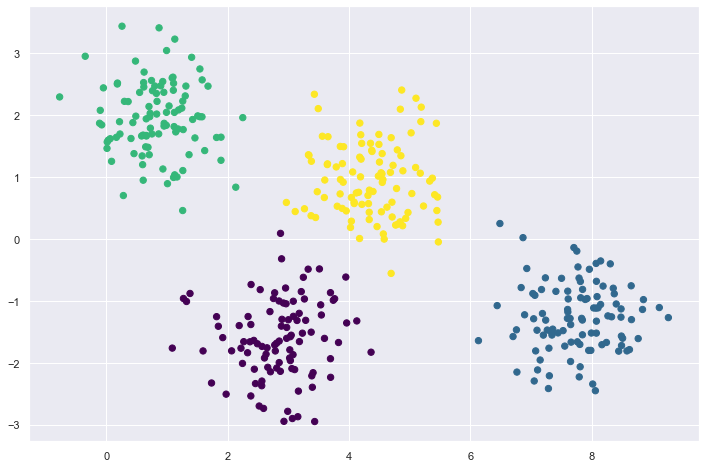

In [66]:
# Plot the data with k-means labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

- No intrinsic measure of probability or uncertainty of cluster assignments

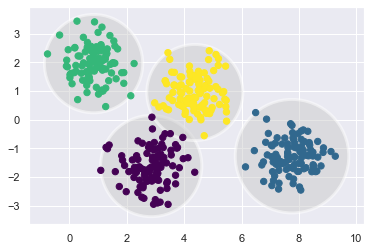

In [67]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    # plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

- Cluster models must be circular: k-means has no built-in way of accounting for oblong or elliptical clusters
- Simple transformation muddles the assignments

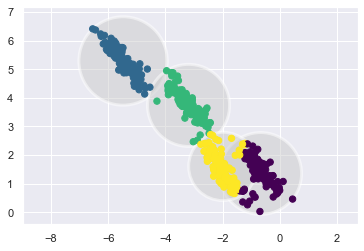

In [68]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

- These two disadvantages of k-means - its lack of flexibility in cluster shape and lack of probabilistic cluster assignment - mean that for many datasets (especially low-dimensional datasets) it may not perform as well as you might hope
- Gaussian mixture model (GMM) attempts to find a mixture of multidimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means

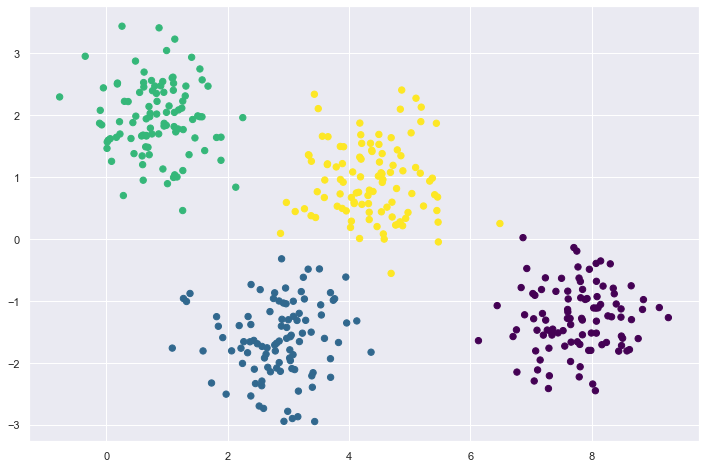

In [69]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [70]:
#a matrix of size [n_samples, n_clusters] that measures the probability that any point belongs to the given cluster:

probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.469 0.    0.    0.531]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]]


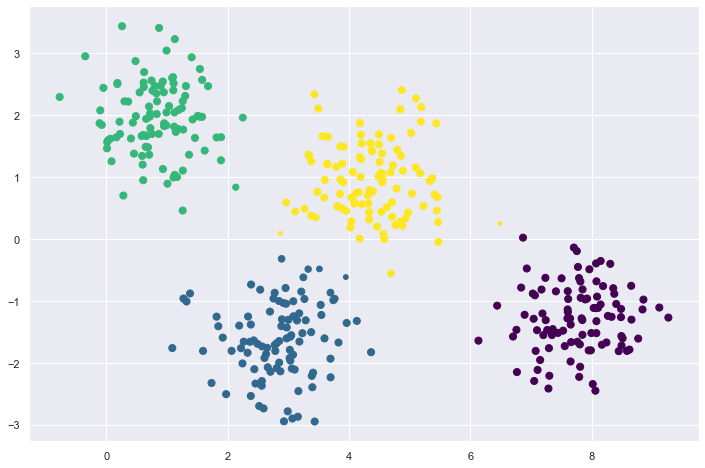

In [71]:
size = 50 * probs.max(1) ** 2 # square emphasizes differences
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

## E-M algorithm:
1. Choose starting guesses for the location and shape
2. Repeat until converged:
    - a. E-step: for each point, find weights encoding the probability of membership in each cluster
    - b. M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights

- This algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used
- Result is a smooth Gaussian model

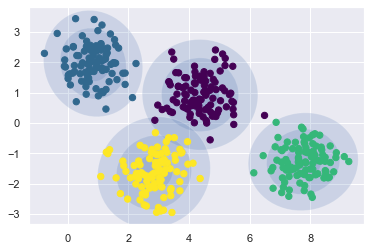

In [72]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

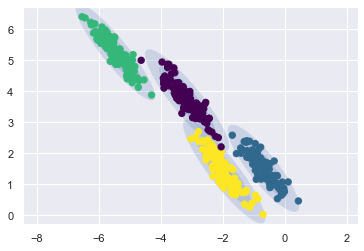

In [73]:
#on stretched data
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

- The default is covariance_type="diag" , which means that the size of the cluster along each dimension can be set independently, with the resulting ellipse constrained to align with the axes. A slightly simpler and faster model is covariance_type="spherical" , which constrains the shape of the cluster such that all dimensions are equal. The resulting clustering will have similar characteristics to that of k-means, though it is not entirely equivalent. A more complicated and computationally expensive model (especially as the number of dimensions grows) is to use covariance_type="full" , which allows each cluster to be modeled as an ellipse with arbitrary orientation.
- GMM as density estimation: the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data

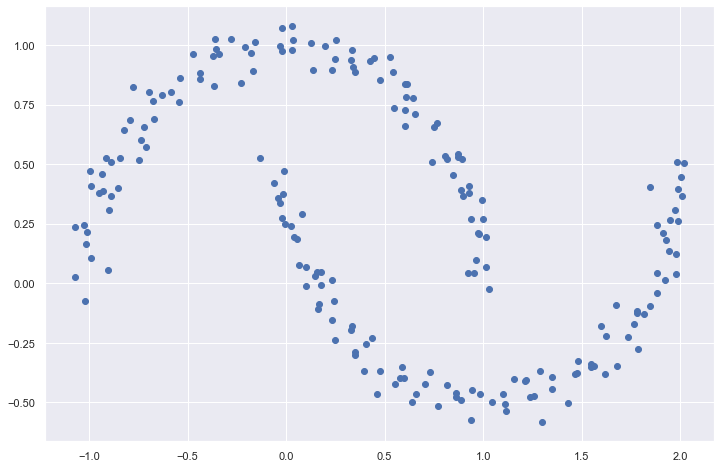

In [74]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.figure(figsize=(12, 8))
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

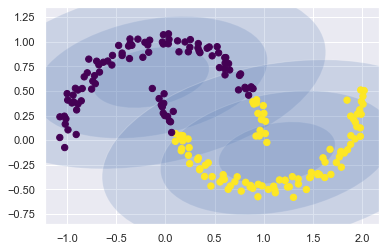

In [75]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

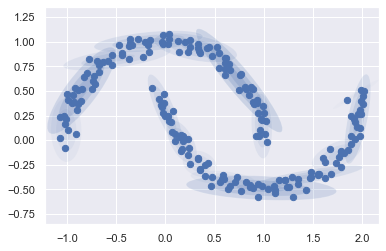

In [76]:
#use many more components and ignore the cluster labels
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

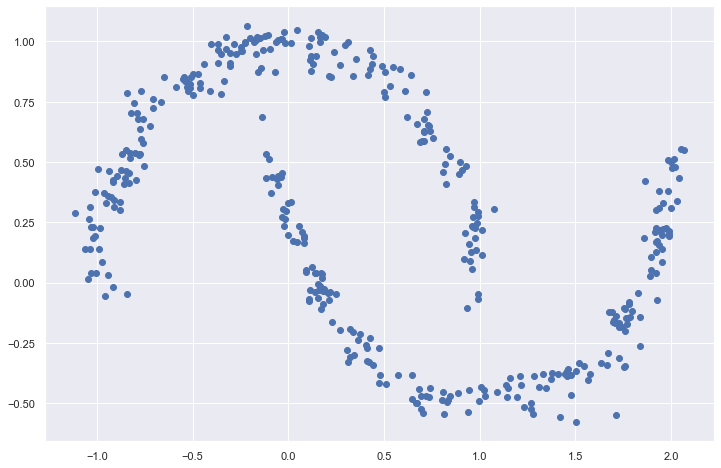

In [77]:
#Here the mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall distribution of the input data. This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input

Xnew = gmm16.sample(400)
plt.figure(figsize=(12, 8))
plt.scatter(Xnew[0][:,0], Xnew[0][:,1]);

- How many components? A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid overfitting. Another means of correcting for overfitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC)

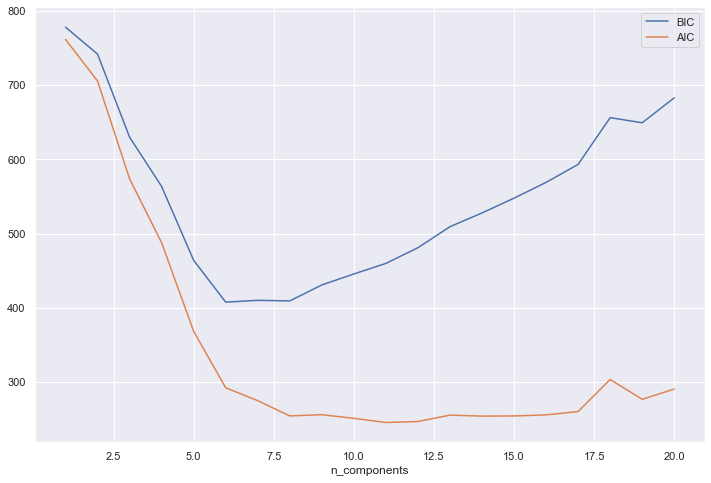

In [78]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in n_components]
plt.figure(figsize=(12, 8))
plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

- As is typical with this sort of problem, the BIC recommends a simpler model
- Better to think of GMM as a density estimator rather than a clustering algorithm unless the dataset is simple

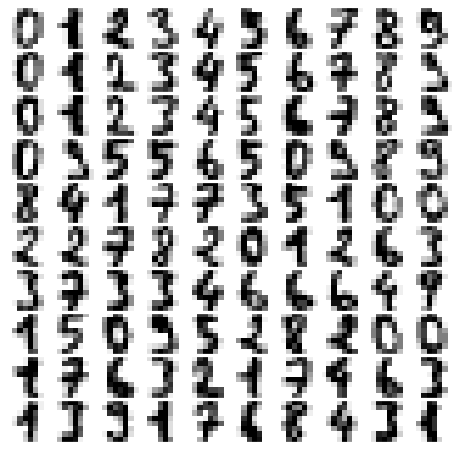

In [79]:
#generate new handwritten digits from the standard digits corpus that we have used before

from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

plot_digits(digits.data)

In [80]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

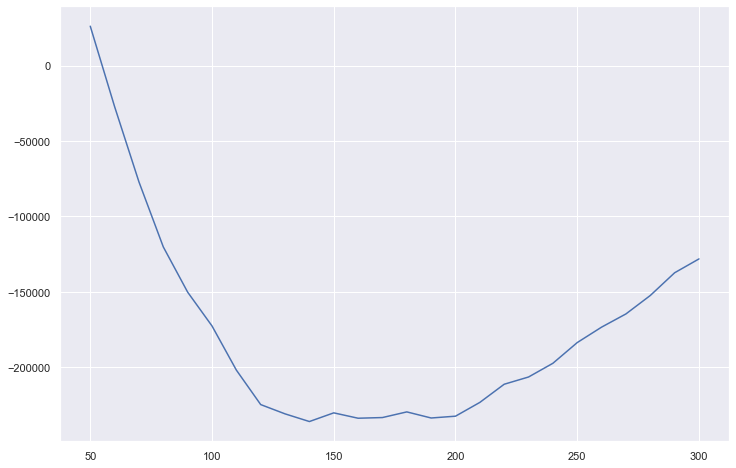

In [81]:
#use AIC:
n_components = np.arange(50, 310, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.figure(figsize=(12, 8))
plt.plot(n_components, aics);

In [82]:
gmm = GaussianMixture(140, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [83]:
#draw new data
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

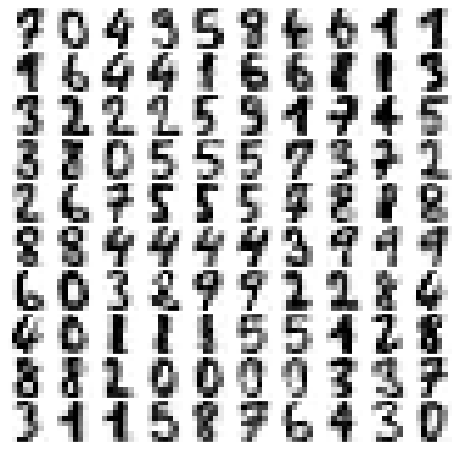

In [84]:
#inverse transform from the PCA
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)

- Such a generative model of digits can prove very useful as a component of a Bayesian generative classifier
- Kernel density estimation (KDE) is in some senses an algorithm that takes the mixture-of-Gaussians idea to its logical extreme: it uses a mixture consisting of one Gaussian component per point, resulting in an essentially nonparametric estimator of density
- For one-dimensional data, you are probably already familiar with one simple density estimator: the histogram

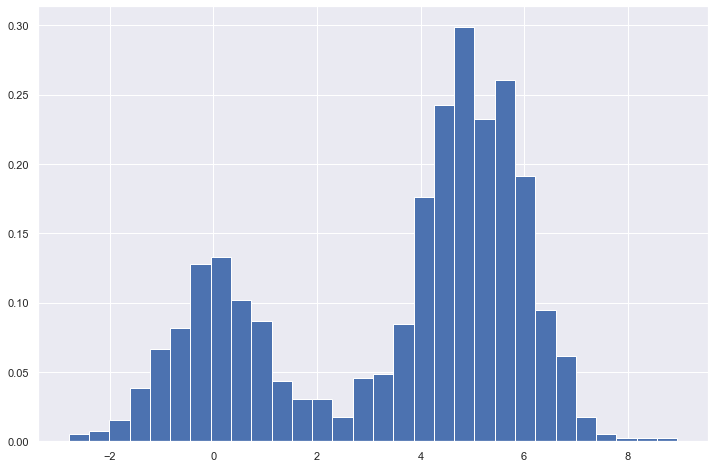

In [85]:
#generate data drawn from two normals
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x
x = make_data(1000)

plt.figure(figsize=(12, 8))
hist = plt.hist(x, bins=30, density=True)

In [86]:
#area under curve is 1 (because we normalize it with density=True)
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

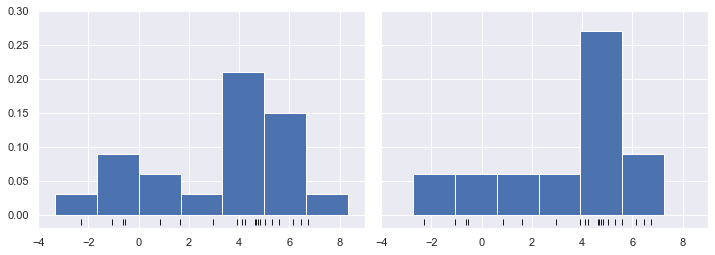

In [87]:
#where we bin makes a difference
x = make_data(20)
bins = np.linspace(-5, 10, 10)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True, subplot_kw={'xlim':(-4, 9), 'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

(-0.2, 8.0)

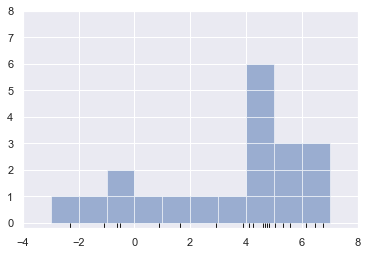

In [88]:
#histograms as stacking blocks
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

- The height of the block stack often reflects not on the actual density of points nearby, but on coincidences of how the bins align with the data points. This misalignment between points and their blocks is a potential cause of the poor histogram results seen here. But what if, instead of stacking the blocks aligned with the bins, we were to stack the blocks aligned with the points they represent? If we do this, the blocks won’t be aligned, but we can add their contributions at each location along the x-axis to find the result.

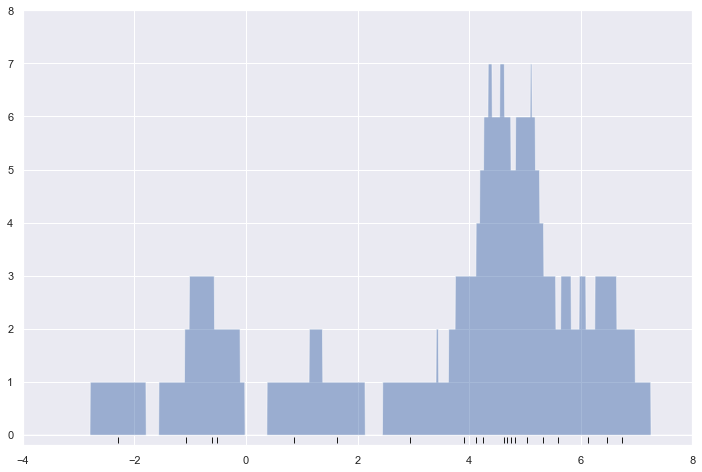

In [89]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)
plt.figure(figsize=(12, 8))
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8]);

- Messy but more robust. we might decide to replace the blocks at each location with a smooth function, like a Gaussian

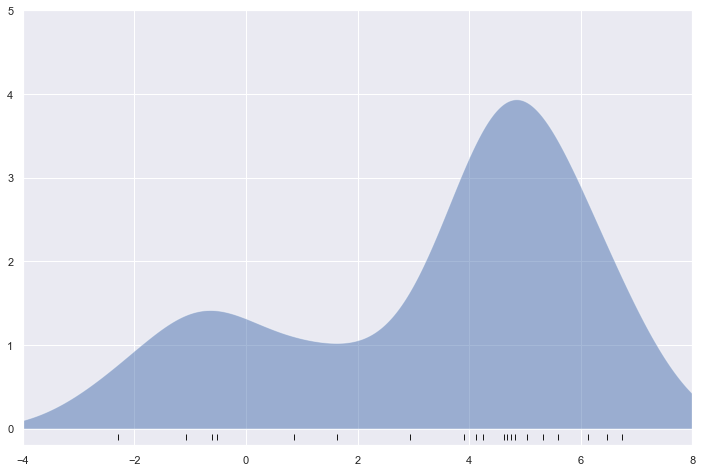

In [90]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
plt.figure(figsize=(12, 8))
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 5]);

- This smoothed-out plot, with a Gaussian distribution contributed at the location of each input point, gives a much more accurate idea of the shape of the data distribution, and one that has much less variance (i.e., changes much less in response to differences in sampling). first example is tophat kernel, second uses Gaussian kernel
- The free parameters of kernel density estimation are the kernel, which specifies the shape of the distribution placed at each point, and the kernel bandwidth, which controls the size of the kernel at each point

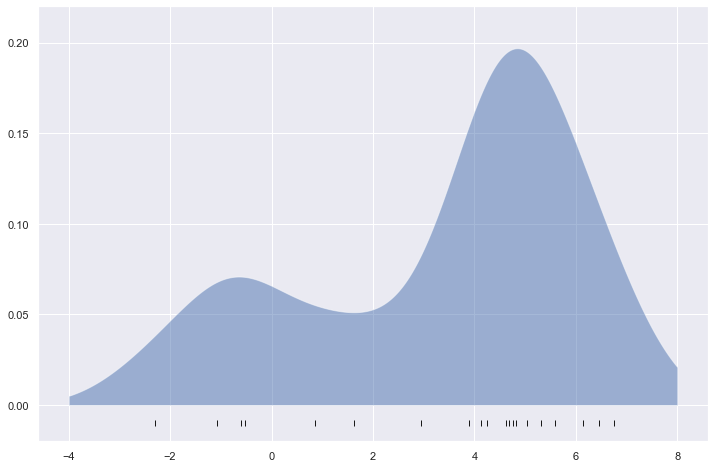

In [91]:
from sklearn.neighbors import KernelDensity
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.figure(figsize=(12, 8))
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22);

- Too narrow a bandwidth leads to a high-variance estimate (i.e., over‐fitting), where the presence or absence of a single point makes a large difference. Too wide a bandwidth leads to a high-bias estimate (i.e., underfitting) where the structure in the data is washed out by the wide kernel

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
{'bandwidth': bandwidths},
cv=LeaveOneOut())
grid.fit(x[:, None]);

grid.best_params_

{'bandwidth': 1.1233240329780276}

## Not so naive bayes
- With a density estimation algorithm like KDE, we can remove the "naive" element and perform the same classification with a more sophisticated generative model for each class. It's still Bayesian classification, but it's no longer naive.
- The general approach for generative classification is this:
    1. Split the training data by label.
    2. For each set, fit a KDE to obtain a generative model of the data. This allows you for any observation x and label y to compute a likelihood P(x|y).
    3. From the number of examples of each class in the training set, compute the class prior, P(y).
    4. For an unknown point x , the posterior probability for each class is P(y|x) ∝ P(x|y) P(y) . The class that maximizes this posterior is the label assigned to the point.

In [93]:
from sklearn.base import BaseEstimator, ClassifierMixin
class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel

    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
        kernel=self.kernel).fit(Xi) for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0]) for Xi in training_sets]
        return self

    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X) for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

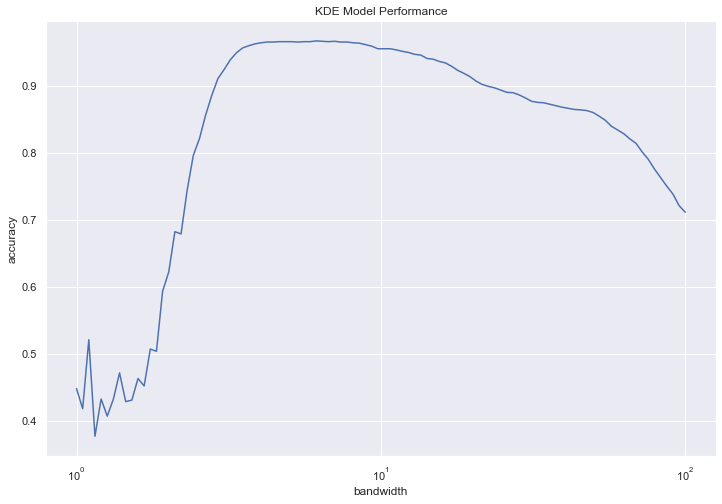

In [94]:
#handwritten digits
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
digits = load_digits()
bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})
grid.fit(digits.data, digits.target)
scores = grid.cv_results_["mean_test_score"]

plt.figure(figsize=(12, 8))
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance');

In [95]:
print(grid.best_params_)
print('accuracy =', grid.best_score_)
#recall the accuracy was about .8 for naive Bayes

{'bandwidth': 6.135907273413174}
accuracy = 0.9677298050139276


In [96]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), digits.data, digits.target).mean()

0.8069281956050759

- There are some improvements that could be made to our KDE classifier model:
    - We could allow the bandwidth in each class to vary independently.
    - We could optimize these bandwidths not based on their prediction score, but on the likelihood of the training data under the generative model within each class (i.e., use the scores from KernelDensity itself rather than the global prediction accuracy).

### Face Detection Pipeline Example
- The Histogram of Gradients is a straightforward feature extraction procedure that was developed in the context of identifying pedestrians within images. HOG involves the following steps:
    1. Optionally prenormalize images. This leads to features that resist dependence on variations in illumination.
    2. Convolve the image with two filters that are sensitive to horizontal and vertical brightness gradients. These capture edge, contour, and texture information.
    3. Subdivide the image into cells of a predetermined size, and compute a histogram of the gradient orientations within each cell.
    4. Normalize the histograms in each cell by comparing to the block of neighboring cells. This further suppresses the effect of illumination across the image.
    5. Construct a one-dimensional feature vector from the information in each cell.

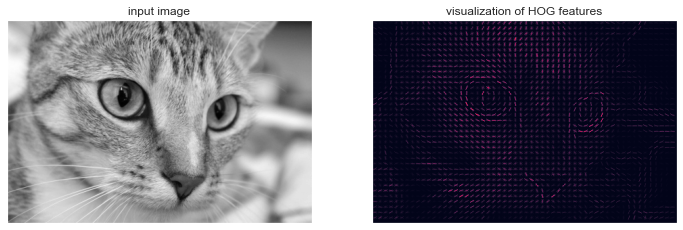

In [97]:
from skimage import data, color, feature
import skimage.data
image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualize=True)
fig, ax = plt.subplots(1, 2, figsize=(12, 6),
subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

In [98]:
#obtain a set of positive training samples
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(6133, 62, 47)

In [99]:
#obtain a set of negative training samples
from skimage import data, transform
imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]

In [100]:
from sklearn.feature_extraction.image import PatchExtractor
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = \
    tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size, max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale) for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

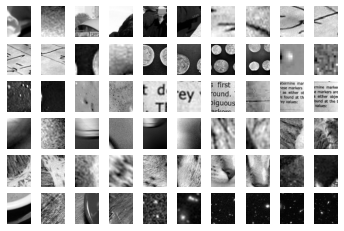

In [101]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [102]:
#combine sets and extract HOG features
from itertools import chain
X_train = np.array([feature.hog(im) for im in chain(positive_patches, negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1
X_train.shape

(36133, 1215)

In [103]:
#start with naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), X_train, y_train)

array([0.95074028, 0.97993635, 0.98173516, 0.9860227 , 0.98325491])

In [104]:
#now let's try SVM
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [1.0, 2.0, 4.0, 8.0]})

In [105]:
grid.best_score_

0.9909223725909287

In [106]:
grid.best_params_

{'C': 1.0}

In [107]:
#take best estimator and retrain on full dataset
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC()

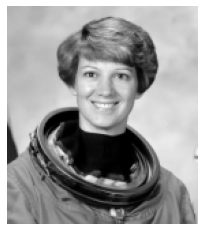

In [108]:
#find faces in a new image
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]
plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [109]:
#create a window that iterates over patches of this image, and compute HOG features for each patch
def sliding_window(img, patch_size=positive_patches[0].shape, istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(1911, 1215)

In [110]:
labels = model.predict(patches_hog)
labels.sum()
#out of 2000 patches, we found 49 detections

47.0

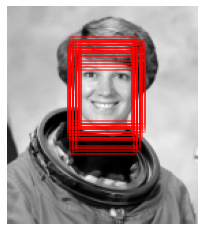

In [111]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)
for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red', alpha=0.3, lw=2, facecolor='none'))

- Our training set, especially for negative features, is not very complete
- Our current pipeline searches only at one scale
- We should combine overlapped detection patches
- The pipeline should be streamlined
- More recent advances, such as deep learning, should be considered